In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_37_diabetes.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,result,Unnamed: 9
0,6,148,72,35,0,33.6,0.627,50,tested_positive,NaN
1,1,85,66,29,0,26.6,0.351,31,tested_negative,NaN
2,8,183,64,0,0,23.3,0.672,32,tested_positive,NaN
3,1,89,66,23,94,28.1,0.167,21,tested_negative,NaN
4,0,137,40,35,168,43.1,2.288,33,tested_positive,NaN


In [3]:
df = df.rename(columns={"class' { tested_negative": 'result'})

df.to_csv('dataset_37_diabetes.csv', index=False)

In [4]:
df.duplicated().sum()

0

In [5]:
df["result"].value_counts()

result
tested_negative    500
tested_positive    268
Name: count, dtype: int64

In [6]:
## balancing the data
Negative = df[df["result"] == 'tested_negative']
Positive = df[df["result"] == 'tested_positive']

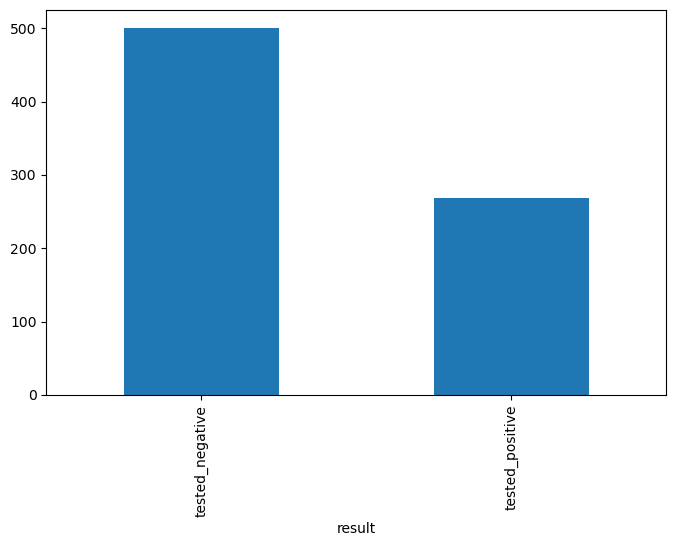

In [7]:
## Check data is balance or not

fig = plt.figure(figsize=(8,5))
df.result.value_counts().plot(kind="bar")
plt.show()

In [8]:
Negative = Negative.sample(250)
Negative.shape

(250, 10)

In [9]:
balance_df = pd.concat([Negative,Positive],axis=0)
balance_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,result,Unnamed: 9
489,8,194,80,0,0,26.1,0.551,67,tested_negative,NaN
513,2,91,62,0,0,27.3,0.525,22,tested_negative,NaN
65,5,99,74,27,0,29.0,0.203,32,tested_negative,NaN
183,5,73,60,0,0,26.8,0.268,27,tested_negative,NaN
98,6,93,50,30,64,28.7,0.356,23,tested_negative,NaN


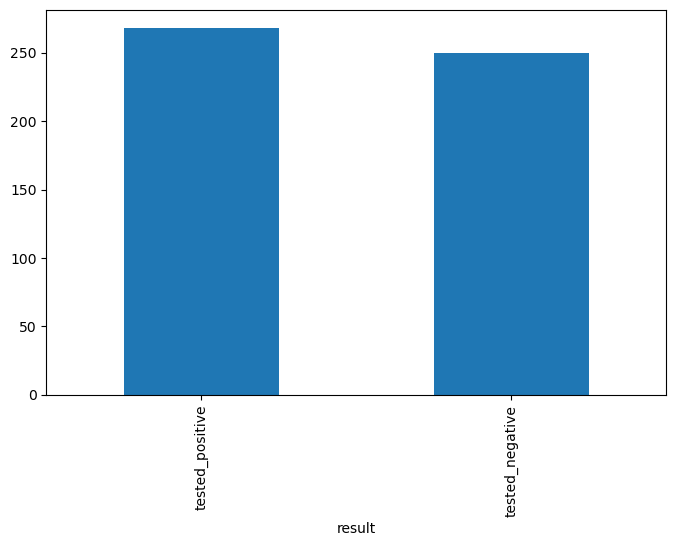

In [10]:
## Check data is balance or not

fig = plt.figure(figsize=(8,5))
balance_df.result.value_counts().plot(kind="bar")
plt.show()

In [11]:
cat_col = balance_df.drop(["Unnamed: 9"],axis=1)
cat_col.head()

,preg,plas,pres,skin,insu,mass,pedi,age,result
489,8,194,80,0,0,26.1,0.551,67,tested_negative
513,2,91,62,0,0,27.3,0.525,22,tested_negative
65,5,99,74,27,0,29.0,0.203,32,tested_negative
183,5,73,60,0,0,26.8,0.268,27,tested_negative
98,6,93,50,30,64,28.7,0.356,23,tested_negative


In [12]:
cat_col =cat_col.select_dtypes(include="O")
cat_col.head()

,result
489,tested_negative
513,tested_negative
65,tested_negative
183,tested_negative
98,tested_negative


In [13]:
num_col = balance_df.drop(["Unnamed: 9"],axis=1)
num_col.head()

,preg,plas,pres,skin,insu,mass,pedi,age,result
489,8,194,80,0,0,26.1,0.551,67,tested_negative
513,2,91,62,0,0,27.3,0.525,22,tested_negative
65,5,99,74,27,0,29.0,0.203,32,tested_negative
183,5,73,60,0,0,26.8,0.268,27,tested_negative
98,6,93,50,30,64,28.7,0.356,23,tested_negative


In [14]:
num_col = num_col.select_dtypes(exclude="O")
num_col.head()

,preg,plas,pres,skin,insu,mass,pedi,age
489,8,194,80,0,0,26.1,0.551,67
513,2,91,62,0,0,27.3,0.525,22
65,5,99,74,27,0,29.0,0.203,32
183,5,73,60,0,0,26.8,0.268,27
98,6,93,50,30,64,28.7,0.356,23


In [15]:
pd.get_dummies(cat_col).astype(int).head()

,result_tested_negative,result_tested_positive
489,1,0
513,1,0
65,1,0
183,1,0
98,1,0


In [16]:
cat_col["result"].value_counts()

result
tested_positive    268
tested_negative    250
Name: count, dtype: int64

In [17]:
dt = {
    'tested_positive':1,
    'tested_negative':0
}

cat_col["result"] = cat_col["result"].map(dt)
cat_col["result"].head()

489    0
513    0
65     0
183    0
98     0
Name: result, dtype: int64

In [18]:
final_df = pd.concat([cat_col,num_col],axis=1)
final_df.head()

,result,preg,plas,pres,skin,insu,mass,pedi,age
489,0,8,194,80,0,0,26.1,0.551,67
513,0,2,91,62,0,0,27.3,0.525,22
65,0,5,99,74,27,0,29.0,0.203,32
183,0,5,73,60,0,0,26.8,0.268,27
98,0,6,93,50,30,64,28.7,0.356,23


In [19]:
## feature selection

x = final_df.drop("result",axis=1)
y = final_df[["result"]]

In [20]:
## training and testing classification

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.23,random_state=42
)

In [39]:
# encoding of y_test

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

In [40]:
y_test.shape

(120,)

In [23]:
## Algorithm

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# to save the model
import joblib,pickle
joblib.dump(model,"diabities.lb")

['diabities.lb']

In [25]:
model.score(x_test,y_test)

0.6583333333333333

In [26]:
model.score(x_train,y_train)

0.7613065326633166

In [27]:
pred = model.predict(x_test)
y_test["prediction"] = pred
y_test

,result,prediction
669,0,1
126,0,1
562,0,0
71,0,1
595,1,1
...,...,...
53,1,1
569,1,0
293,1,1
726,0,0


In [28]:
## Model evaluation

from sklearn.metrics import confusion_matrix,classification_report

In [29]:
confusion_matrix(y_test["result"],y_test["prediction"])

array([[33, 24],
       [17, 46]], dtype=int64)

<Axes: >

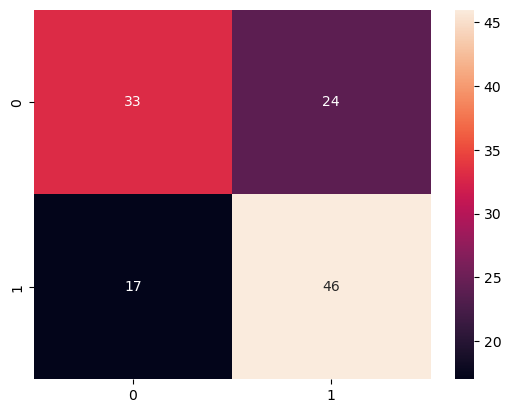

In [30]:
sns.heatmap(confusion_matrix(y_test["result"],y_test["prediction"]),annot=True,fmt='d')

In [31]:
## classification report
print(classification_report(y_test["result"],y_test["prediction"]))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62        57
           1       0.66      0.73      0.69        63

    accuracy                           0.66       120
   macro avg       0.66      0.65      0.65       120
weighted avg       0.66      0.66      0.66       120



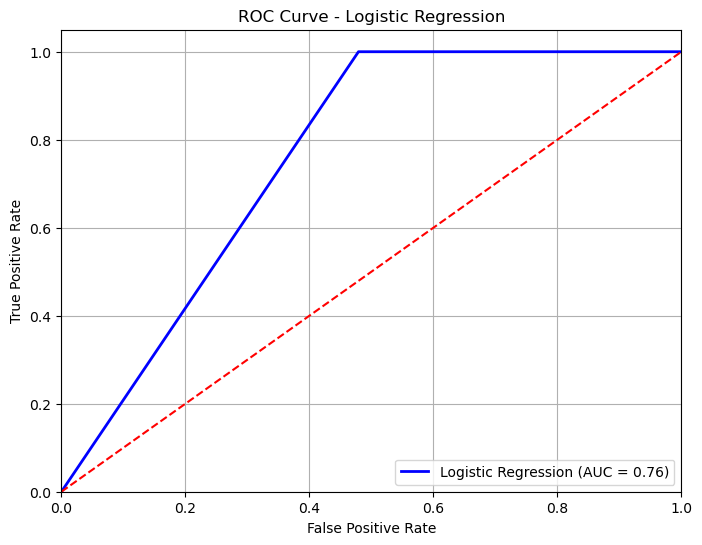

In [41]:
## ROC curve

from sklearn.metrics import roc_curve,auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()